In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [31]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

##### Data Preprocessing

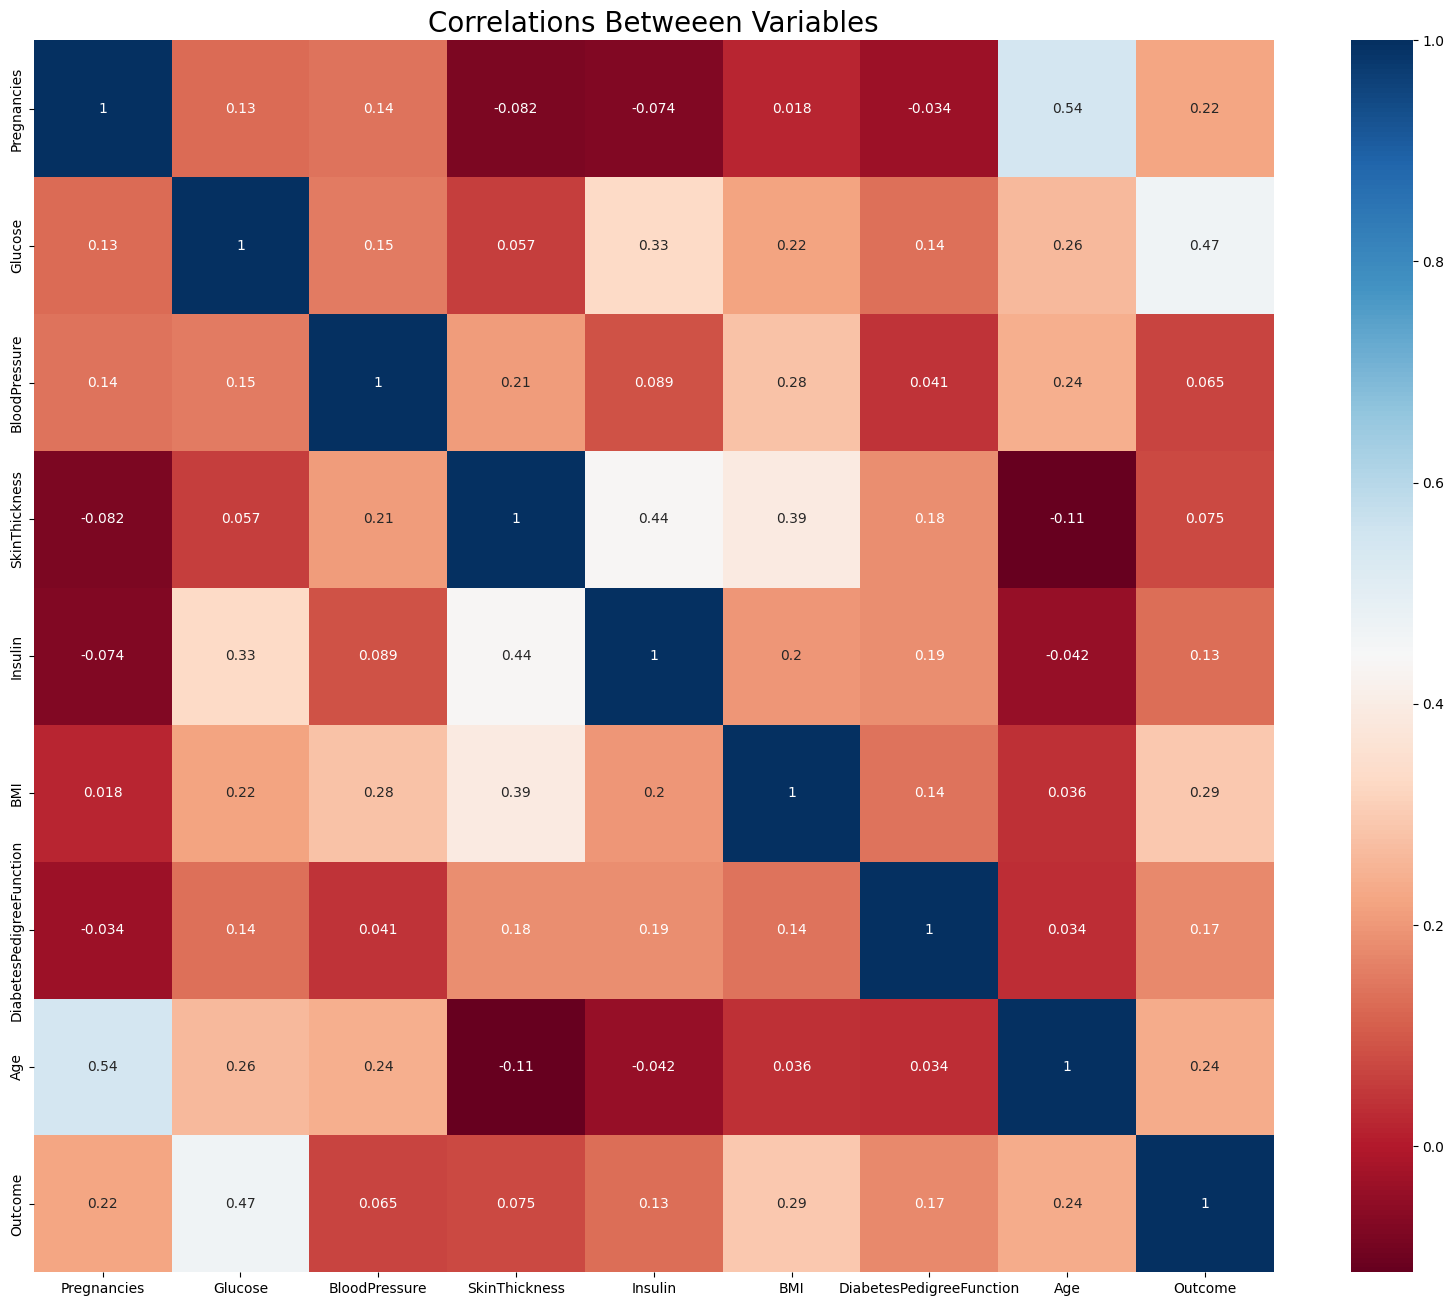

In [33]:
#Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

In [34]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [35]:
# Now, we can look at where are missing values
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

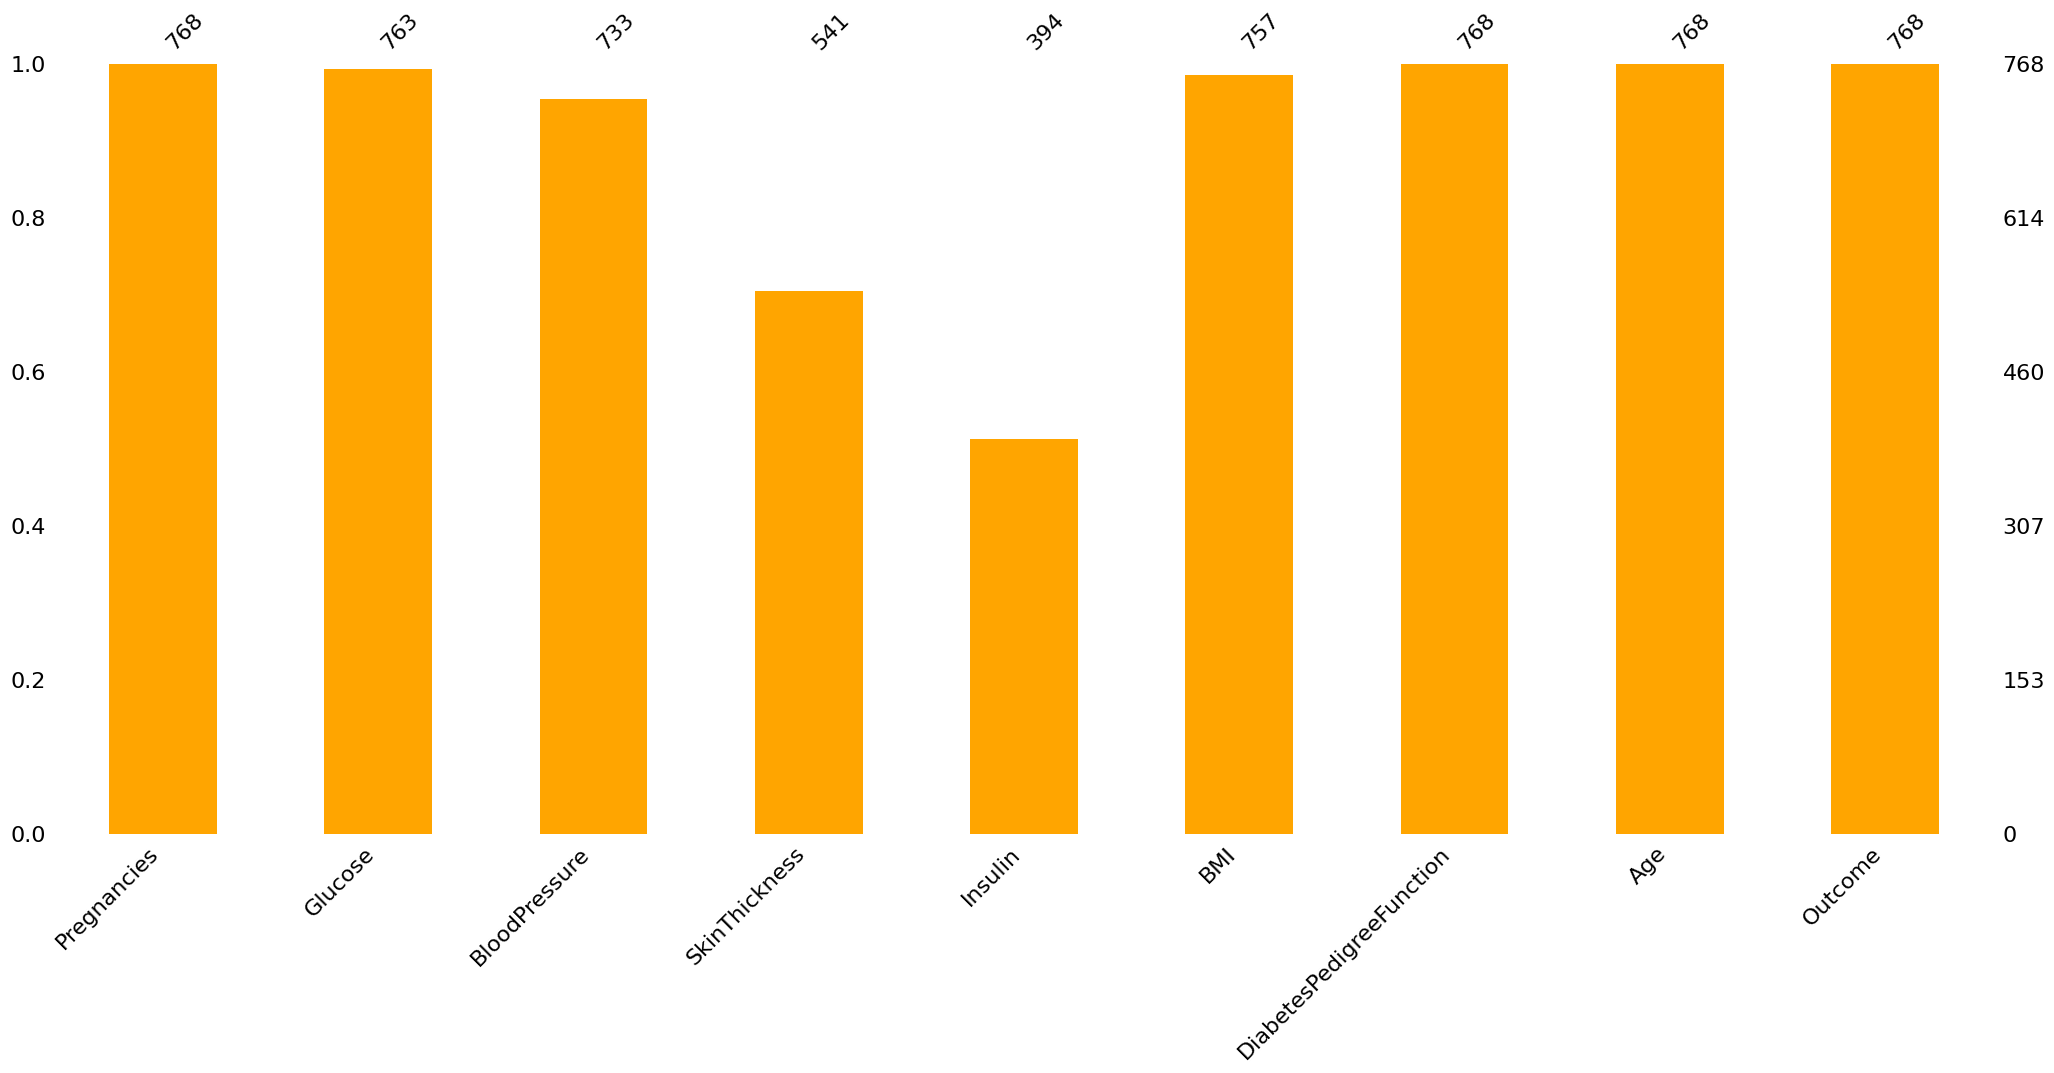

In [36]:
# Visualizing the missing observations using the missingno library
import missingno as msno
msno.bar(data, color="orange");

In [37]:
# The missing values will be filled with the median values of each variable
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [38]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_target(i)[i][1]
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Set up features and target

In [39]:
X = data.drop(columns='Outcome',axis=1)
Y = data['Outcome']


##### Splitting test and train data

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

#### Modelling

##### 1. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)
rf.fit(X_train,Y_train)
#Accuracy on training data
pred_train_rf = rf.predict(X_train)
rf_train_accuracy = round(accuracy_score(pred_train_rf,Y_train)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(rf_train_accuracy)+" %")
#Accuracy on test data
rf_test_pred = rf.predict(X_test)
rf_test_accuracy = round(accuracy_score(rf_test_pred,Y_test)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(rf_test_accuracy)+" %")

The accuracy score achieved using the Random Forest model is: 100.0 %
The accuracy score achieved using the Random Forest model is: 88.96 %


##### 2. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
#Accuracy on training data
lg_train_prediction = model.predict(X_train)
lg_training_data_accuracy = round(accuracy_score(lg_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(lg_training_data_accuracy)+" %")
#Accuracy on test data
lg_test_prediction = model.predict(X_test)
lg_test_data_accuracy = round(accuracy_score(lg_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(lg_test_data_accuracy)+" %")

The accuracy score achieved using the Logistic Regression model is: 77.36 %
The accuracy score achieved using the Logistic Regression model is: 77.27 %


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 3. Support Vector Machine

In [43]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train,Y_train)
#Accuracy on training data
svc_train_prediction = svm.predict(X_train)
svc_training_data_accuracy = round(accuracy_score(svc_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(svc_training_data_accuracy)+" %")
#Accuracy on test data
svc_test_prediction = svm.predict(X_test)
svc_test_data_accuracy = round(accuracy_score(svc_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(svc_test_data_accuracy)+" %")


The accuracy score achieved using the SVM model is: 86.16 %
The accuracy score achieved using the SVM model is: 84.42 %


##### 4. KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
#Accuracy on training data
knn_train_prediction = knn.predict(X_train)
knn_training_data_accuracy = round(accuracy_score(knn_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(knn_training_data_accuracy)+" %")
#Accuracy on test data
knn_test_prediction = svm.predict(X_test)
knn_test_data_accuracy = round(accuracy_score(knn_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(knn_test_data_accuracy)+" %")

The accuracy score achieved using the KNN model is: 88.6 %
The accuracy score achieved using the KNN model is: 84.42 %


##### Naive Bayes Model

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
#Accuracy on training data
nbm_train_prediction = nb.predict(X_train)
nbm_training_data_accuracy = round(accuracy_score(nbm_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(nbm_training_data_accuracy)+" %")
#Accuracy on test data
nbm_test_prediction = nb.predict(X_test)
nbm_test_data_accuracy = round(accuracy_score(nbm_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(nbm_test_data_accuracy)+" %")

The accuracy score achieved using the Naive Bayes model is: 77.2 %
The accuracy score achieved using the Naive Bayes model is: 75.32 %


##### Comparison of Model Accuracy

In [46]:
scores = [lg_test_data_accuracy,nbm_test_data_accuracy,svc_test_data_accuracy,knn_test_data_accuracy,rf_test_accuracy]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 77.27 %
The accuracy score achieved using Naive Bayes is: 75.32 %
The accuracy score achieved using Support Vector Machine is: 84.42 %
The accuracy score achieved using K-Nearest Neighbors is: 84.42 %
The accuracy score achieved using Random Forest is: 88.96 %


Text(0, 0.5, 'Accuracy score')

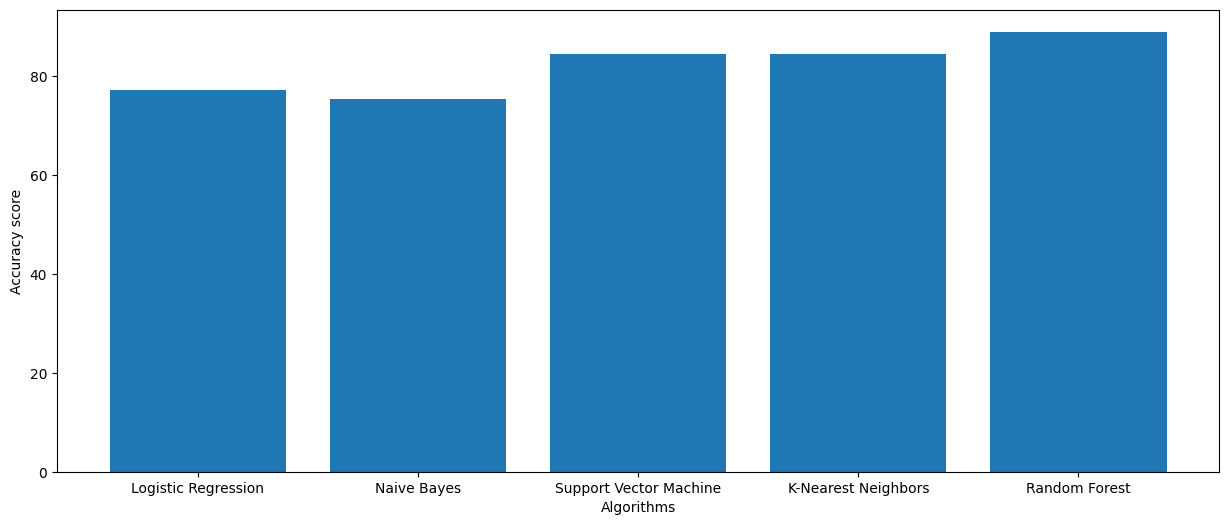

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (15,6))
plt.bar(algorithms,scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

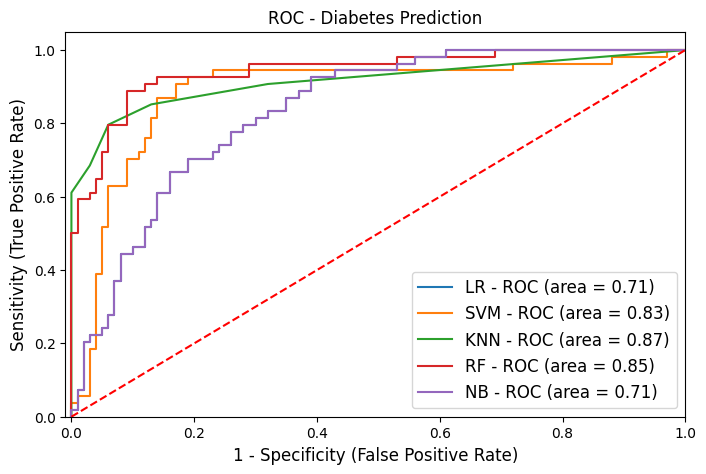

In [53]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': model,
},

{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rf,
},
{
   'label': 'NB',
   'model': nb,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
#plt.savefig("outputs/roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

#### Predictive Model

In [51]:
input_data = (1,103,30,38,83,43.3,0.183,33)
#change input data to numpy array
input_array = np.array(input_data).reshape((1, -1))
prediction = rf.predict(input_array)
print("Predicted value: ", prediction)

if prediction[0]==0:
    print("Person doesn't have diabetes disease")
else:
    print("Person has diabetes disease")

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted value:  [0]
Person doesn't have diabetes disease


In [52]:
import pickle
file_name = 'diabetes_model.sav'
pickle.dump(rf,open(file_name,'wb'))